## - Exercici 1
### Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

He escollit agafar 13 crítiques del videojoc "Lies of p" de la pàgina web de Metacritics. Aquest és un videojoc que va sortir al mercat el passat dia 19 de Setembre i que despertava molt entusiasme per part de la comunitat gamer. Es tracta d'un videojoc que, com molts altres, es basa i intenta imitar una saga dirigida per FromSoftware anomenada la saga "Souls" que inclou un gran repertori de jocs, entre ells Bloodborne (per mols fans el millor). Aquest fet produeix una certa polèmica ja que s'espera molt d'un joc que està cridat a ser el nou "Bloodborne". Tot i les altes espectatives, "Lies of p" ha complert prou bé amb els seus objectius i ha aconseguit unes puntuacions molt altes a les pàgines de crítica gamer.

In [180]:
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer

In [204]:
nom_fitxer = "criticas.txt"

try:
    with open(nom_fitxer, "r") as fitxer:
        contingut = fitxer.read()
        print(contingut)
except FileNotFoundError:
    print(f"El fitxer '{nom_fitxer}' no s'ha trobat'.")
except Exception as e:
    print(f"Ha hagut un error: {str(e)}")

It looks good, but the lack of balance in difficulty makes this game the most horrible and frustrating experience I've ever had to bear in a video game. Last boss is impossible to beat after +50 attempts and 45 hours of play. Please do not play this game.
The game in question presents a rather disappointing experience. First and foremost, the graphics in this title leave much to be desired. They appear outdated and fail to deliver the immersive visual experience that modern gamers have come to expect. The lack of attention to detail and graphical fidelity detracts significantly from the overall enjoyment of the game. Furthermore, it's difficult to overlook the fact that this game seems to be a blatant copy of "Bloodborne." From the gameplay mechanics to the overall dark and gothic aesthetic, it's clear that the developers have drawn heavy inspiration from FromSoftware's masterpiece. While taking inspiration from successful games is not inherently problematic, this title fails to bring 

In [205]:
import re
contingut = contingut.lower() #Transforma mayusculas en minusculas.
contingut = re.sub(r'[.,-:;\'\\"``'']', '', contingut) #Elimina del text els elements indicats 
contingut

'it looks good but the lack of balance in difficulty makes this game the most horrible and frustrating experience ive ever had to bear in a video game last boss is impossible to beat after + attempts and  hours of play please do not play this game\nthe game in question presents a rather disappointing experience first and foremost the graphics in this title leave much to be desired they appear outdated and fail to deliver the immersive visual experience that modern gamers have come to expect the lack of attention to detail and graphical fidelity detracts significantly from the overall enjoyment of the game furthermore its difficult to overlook the fact that this game seems to be a blatant copy of bloodborne from the gameplay mechanics to the overall dark and gothic aesthetic its clear that the developers have drawn heavy inspiration from fromsoftwares masterpiece while taking inspiration from successful games is not inherently problematic this title fails to bring anything new or innova

In [257]:
tokens = nltk.word_tokenize(contingut)
tokens #Fa una llista amb totes les paraules del text en ordre"

['it',
 'looks',
 'good',
 'but',
 'the',
 'lack',
 'of',
 'balance',
 'in',
 'difficulty',
 'makes',
 'this',
 'game',
 'the',
 'most',
 'horrible',
 'and',
 'frustrating',
 'experience',
 'ive',
 'ever',
 'had',
 'to',
 'bear',
 'in',
 'a',
 'video',
 'game',
 'last',
 'boss',
 'is',
 'impossible',
 'to',
 'beat',
 'after',
 '+',
 'attempts',
 'and',
 'hours',
 'of',
 'play',
 'please',
 'do',
 'not',
 'play',
 'this',
 'game',
 'the',
 'game',
 'in',
 'question',
 'presents',
 'a',
 'rather',
 'disappointing',
 'experience',
 'first',
 'and',
 'foremost',
 'the',
 'graphics',
 'in',
 'this',
 'title',
 'leave',
 'much',
 'to',
 'be',
 'desired',
 'they',
 'appear',
 'outdated',
 'and',
 'fail',
 'to',
 'deliver',
 'the',
 'immersive',
 'visual',
 'experience',
 'that',
 'modern',
 'gamers',
 'have',
 'come',
 'to',
 'expect',
 'the',
 'lack',
 'of',
 'attention',
 'to',
 'detail',
 'and',
 'graphical',
 'fidelity',
 'detracts',
 'significantly',
 'from',
 'the',
 'overall',
 'enjoym

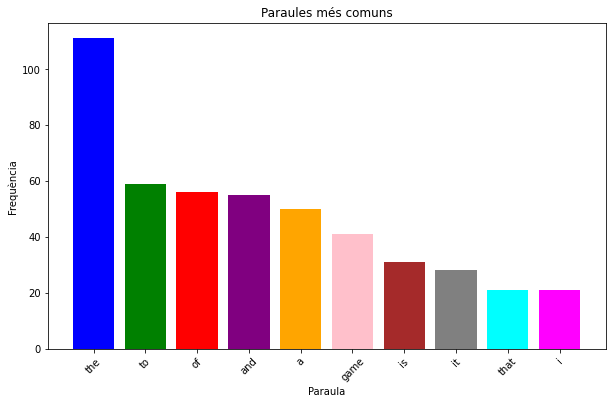

In [208]:
import matplotlib.pyplot as plt
from collections import Counter #importa comptadir
colores = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan', 'magenta']
#Colors de l'histograma
frecuencia_palabras = Counter(tokens)#Compta la freqüència de cada paraula 

# Obtenir las 10 paraules més comunes
palabras_comunes = frecuencia_palabras.most_common(10) #Agafa les 10 més freq

# Separar les paraules i les freq
tokens, frecuencias = zip(*palabras_comunes)

# Graficar l'histograma
plt.figure(figsize=(10, 6))
plt.bar(tokens, frecuencias, color=colores)
plt.title('Paraules més comuns')
plt.xlabel('Paraula')
plt.ylabel('Frequència')
plt.xticks(rotation=45)
plt.show()

Aquest histograma no aconsegueix representar el que s'intenta ja que conté paraules irrellevants com "the", "of" o "and". Per evitar que això passi, utilitzaré un algortime que elimina les "stopwords".

## - Exercici 2
### Treu les stopwords i realitza stemming al teu conjunt de dades.

### 2.1. Treu les stopwords

Les stopwords son aquelles paraules que no aportan res a l'hora de realitzar l'algoritme d'anàlisi de sentiments. Per aquesta raó és millor eliminar-les. 

In [219]:
stopWords = set(stopwords.words('english')) 
words = nltk.word_tokenize(contingut)
wordsFiltered = [w for w in words if w not in stopWords]
wordsFiltered 

['looks',
 'good',
 'lack',
 'balance',
 'difficulty',
 'makes',
 'game',
 'horrible',
 'frustrating',
 'experience',
 'ive',
 'ever',
 'bear',
 'video',
 'game',
 'last',
 'boss',
 'impossible',
 'beat',
 '+',
 'attempts',
 'hours',
 'play',
 'please',
 'play',
 'game',
 'game',
 'question',
 'presents',
 'rather',
 'disappointing',
 'experience',
 'first',
 'foremost',
 'graphics',
 'title',
 'leave',
 'much',
 'desired',
 'appear',
 'outdated',
 'fail',
 'deliver',
 'immersive',
 'visual',
 'experience',
 'modern',
 'gamers',
 'come',
 'expect',
 'lack',
 'attention',
 'detail',
 'graphical',
 'fidelity',
 'detracts',
 'significantly',
 'overall',
 'enjoyment',
 'game',
 'furthermore',
 'difficult',
 'overlook',
 'fact',
 'game',
 'seems',
 'blatant',
 'copy',
 'bloodborne',
 'gameplay',
 'mechanics',
 'overall',
 'dark',
 'gothic',
 'aesthetic',
 'clear',
 'developers',
 'drawn',
 'heavy',
 'inspiration',
 'fromsoftwares',
 'masterpiece',
 'taking',
 'inspiration',
 'successful',
 

In [258]:
print("Nombre d'elements text abans:", len(tokens))
print("Nombre d'elements text ara:", len(wordsFiltered))

Nombre d'elements text abans: 1757
Nombre d'elements text ara: 940


### 2.2. Stemming

És un metode per retornar les paraules a la seva arrel.

In [221]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
print("{0:20}{1:20}".format("--Word--","--Stem--"))
for word in wordsFiltered:
    print ("{0:20}{1:20}".format(word, ps.stem(word)))

--Word--            --Stem--            
looks               look                
good                good                
lack                lack                
balance             balanc              
difficulty          difficulti          
makes               make                
game                game                
horrible            horribl             
frustrating         frustrat            
experience          experi              
ive                 ive                 
ever                ever                
bear                bear                
video               video               
game                game                
last                last                
boss                boss                
impossible          imposs              
beat                beat                
+                   +                   
attempts            attempt             
hours               hour                
play                play                
please          

És una comparació entre les paraules abans i després de fer l'stemming.

In [222]:
stemmed = [ps.stem(word) for word in wordsFiltered]
#Conté les arrels de les paraules de la llista wordsFiltered.

### 2.3. Histograma

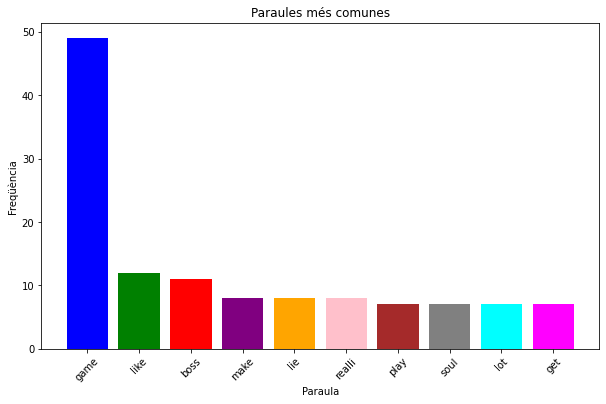

In [214]:
#Colors de l'histograma
# Generar colores aleatorios para las barras

frecuencia_palabras = Counter(stemmed)#Compta la freqüència de cada paraula 

# Obtenir les 10 paraules
palabras_comunes = frecuencia_palabras.most_common(10) #Agafa les 10 més freq

# Separar les paraules i les freq
stemmed, frecuencias = zip(*palabras_comunes)

# Graficar l'histograma
plt.figure(figsize=(10, 6))
plt.bar(stemmed, frecuencias, color=colores)
plt.title('Paraules més comunes')
plt.xlabel('Paraula')
plt.ylabel('Freqüència')
plt.xticks(rotation=45)
plt.show()

Aquesta gràfica representa millor el text. A l'eix x apareixen les 10 paraules més utilitzades y a l'eix de les y apareix la freqüència de cada paraula o, dit d'una altra manera, les vegades que aquesta paraula apareix al text. La paraula més utilitzada és, amb diferència "game". "Boss" que es refereix als enemics poderosos. Like i realli representen opinions. Lie, ja que el nom del joc és "Lies of p". També apareix "Soul" ja que, molts cops, els usuaris recórren a una comparació entre el joc i la saga "souls" dirigida per una altra companyia.

In [224]:
text_final = " ".join(stemmed)
text_final

'look good lack balanc difficulti make game horribl frustrat experi ive ever bear video game last boss imposs beat + attempt hour play pleas play game game question present rather disappoint experi first foremost graphic titl leav much desir appear outdat fail deliv immers visual experi modern gamer come expect lack attent detail graphic fidel detract significantli overal enjoy game furthermor difficult overlook fact game seem blatant copi bloodborn gameplay mechan overal dark gothic aesthet clear develop drawn heavi inspir fromsoftwar masterpiec take inspir success game inher problemat titl fail bring anyth new innov tabl leav player sens dã©jã vu rather fresh engag experi perhap critic flaw game stori narr simpl also remark bore lack depth intrigu memor charact often hallmark great storytel video game player may find challeng becom emot invest plot care outcom signific shortcom medium engag storytel elev game great sole visual soul chines bloodborn doesnt give even half satisfact adv

## - Exercici 3
### Realitza sentiment analysis al teu conjunt de dades.

Un cop que el text està preparat per fer l'anàlisis de sentiment, és molt complicat realitzar el df ja que aquest ha perdut la seva forma original. M'he trobat amb la dificultat que no podia fer el df ja que no podia expressar que volia separar per files segons canvis de linea ja que el text procesat està completament deformat i ja no existeixen canvis de linea. 

Per solucionar-ho he tornat a baixar el fitxer original. En comptes de fer tot el procés aplicat directament al text, ho he fet aplicant-ho a cada critica per separat. Amb un bucle for es va recorrent cadascuna de les 13 crítiques i es va aplicant el stopwords i stemming. Finalment el resultat és un df on cada fila conté una crítica. D'aquesta manera podré fer el anàlisi de sentiments a cadascuna de les 13 crítiques i indicar si és possitiva o negativa

In [225]:
nom_fitxer = "criticas.txt"

try:
    with open(nom_fitxer, "r") as fitxer:
        texto_original = fitxer.read()
        print(texto_original)
except FileNotFoundError:
    print(f"El fitxer '{nom_fitxer}' no s'ha trobat'.")
except Exception as e:
    print(f"Ha hagut un error: {str(e)}")

It looks good, but the lack of balance in difficulty makes this game the most horrible and frustrating experience I've ever had to bear in a video game. Last boss is impossible to beat after +50 attempts and 45 hours of play. Please do not play this game.
The game in question presents a rather disappointing experience. First and foremost, the graphics in this title leave much to be desired. They appear outdated and fail to deliver the immersive visual experience that modern gamers have come to expect. The lack of attention to detail and graphical fidelity detracts significantly from the overall enjoyment of the game. Furthermore, it's difficult to overlook the fact that this game seems to be a blatant copy of "Bloodborne." From the gameplay mechanics to the overall dark and gothic aesthetic, it's clear that the developers have drawn heavy inspiration from FromSoftware's masterpiece. While taking inspiration from successful games is not inherently problematic, this title fails to bring 

In [238]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
nltk.download('punkt')
nltk.download('stopwords')
# Tokeniza el texto en oraciones
oraciones = texto_original.split('\n')

# Inicializa el stemmer de Porter
ps = PorterStemmer()

# Define las stopwords en español
stopwords_es = set(stopwords.words('english'))

# Procesa cada oración y crea una lista de oraciones procesadas
oraciones_procesadas = []
for oracion in oraciones:
    # Elimina caracteres de puntuación y convierte a minúsculas
    oracion = re.sub(r'[.,-:;\'\\"``'']', '', oracion).lower()
    
    # Tokeniza la oración en palabras
    palabras = nltk.word_tokenize(oracion)
    
    # Aplica stemming y elimina stopwords
    palabras_procesadas = [ps.stem(palabra) for palabra in palabras if palabra not in stopwords_es]
    
    # Une las palabras procesadas en una oración procesada
    oracion_procesada = " ".join(palabras_procesadas)
    
    # Agrega la oración procesada a la lista de oraciones procesadas
    oraciones_procesadas.append(oracion_procesada)

# Crea un DataFrame con las oraciones procesadas
df = pd.DataFrame({"Oraciones Procesadas": oraciones_procesadas})

# Imprime el DataFrame
print(df)

                                 Oraciones Procesadas
0   look good lack balanc difficulti make game hor...
1   game question present rather disappoint experi...
2   sole visual soul chines bloodborn doesnt give ...
3   game ruin design misstep stem shallow idea ass...
4   im guess soulslik gamer enjoy play game lie p ...
5   okay good areaseveryth feel wrong bore displac...
6   lot cover iâ€™ll tri best make short game lot ...
7   game unbalanc stop play almost end sometim unf...
8   thereâ€™ enjoy found lie p action compet lack ...
9   iâ€™m gon na go straight point fell love game ...
10  best soul like date ! gameplay stori combat be...
11  superb entri soulsborn genr lie p uniqu elemen...
12  lie p beauti written game set uniqu interest s...


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marco\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [239]:
df["Possitiu"]=[0,0,0,0,0,0,0,0,0,1,1,1,1]
#La columna Possitiu ens diu si la crítica realment és possitiva o negativa. Si es 0 és negativa.

In [240]:
df 

,Oraciones Procesadas,Possitiu
0,look good lack balanc difficulti make game hor...,0
1,game question present rather disappoint experi...,0
2,sole visual soul chines bloodborn doesnt give ...,0
3,game ruin design misstep stem shallow idea ass...,0
4,im guess soulslik gamer enjoy play game lie p ...,0
5,okay good areaseveryth feel wrong bore displac...,0
6,lot cover iâ€™ll tri best make short game lot ...,0
7,game unbalanc stop play almost end sometim unf...,0
8,thereâ€™ enjoy found lie p action compet lack ...,0
9,iâ€™m gon na go straight point fell love game ...,1


Les crítiques al videojoc "Lies of p" han sigut recollides de la pàgina de Metacrítics. Cadascuna portava associada la nota que l'usuari li dona al videojoc. Les notes iguals o superiors a 5 se'ls ha assignat un 1 i les notes inferiors a 5 se'ls ha assignat un 0

In [242]:
for i,fila in df.iterrows():
    texto_fila = df.loc[i, 'Oraciones Procesadas']
    sentimientos_fila = analyzer.polarity_scores(texto_fila)
        
    print("Puntuació de Sentimient:", sentimientos_fila['compound'])

Puntuació de Sentimient: 0.6597
Puntuació de Sentimient: 0.6486
Puntuació de Sentimient: -0.9399
Puntuació de Sentimient: -0.2268
Puntuació de Sentimient: -0.9727
Puntuació de Sentimient: 0.5994
Puntuació de Sentimient: -0.9417
Puntuació de Sentimient: -0.483
Puntuació de Sentimient: -0.2876
Puntuació de Sentimient: 0.9665
Puntuació de Sentimient: 0.937
Puntuació de Sentimient: 0.9336
Puntuació de Sentimient: 0.9905


6/9 de crítiques realment negatives han sigut considerades negatives. En canvi, 4/4 crítiques possitives han sigut considerades correctament pel model. 

El model no ha tingut problema a l'hora de predir les crítiques possitives. La puntuació de sentiment, en tots els casos, s'aproxima molt a l'1. En canvi, per a les crítiques negatives, ha tingut més problemes. 

Els falsos possitius, que són 3, han sigut puntuats per baix del 0,7. El que indica que el model no perceb que la crítica sigui totalment possitiva, sinó que hi han sentiments negatius. Això pot ser degut a que hi han components possitius a la crítica que el model els dona massa importància i s'acaben impossant a la resta de sentiments negatius. A més, molts crítics fan comparacions amb altres jocs. Aquestes comparacions expressen sentiments possitius cap a l'altre joc. Això pot estar confonent a l'algoritme. 

In [256]:
filas_a_procesar = [0, 1, 5]
for i in filas_a_procesar:
    sent_analy = SentimentIntensityAnalyzer()
    sentiments = sent_analy.polarity_scores(df.loc[i, 'Oraciones Procesadas'])
    print("Sentiments per a la fila {}: {}".format(i, sentiments))

Sentiments per a la fila 0: {'neg': 0.074, 'neu': 0.677, 'pos': 0.248, 'compound': 0.6597}
Sentiments per a la fila 1: {'neg': 0.143, 'neu': 0.698, 'pos': 0.159, 'compound': 0.6486}
Sentiments per a la fila 5: {'neg': 0.267, 'neu': 0.352, 'pos': 0.381, 'compound': 0.5994}


Es pot veure com l'algoritme classifica les crítiques en percentatges negatius, neutres o possitius. 

Les tres crítiques que ha classificat erroneament com possitives tenen més percentatge neutral, però es decanten per possitiu.

Com conclussió, el model d'anàlisis de sentiment és molt interessant, però té certes limitacions. Aquestes poden ser la falta de contexte en textos curts com és el cas, expressions ambigües, léxic incorrecte, jerga, etc. Per millorar el model es podrien utilitzar models d'aprenentatge com xarxes neuronals. Aplicar deteccions d'emocions com l'alegría, l'enuig o la tristesa en comptes de només classificar en possitiu, negatiu i neutral. 